In [5]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 
RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

Loading data

In [6]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Loubaba\Loubaba ;)\BDIA 1\S2\ML\TP ML\TP12 ML\CARDIOVASCULAR-DISEASE-DIAGNOSIS\heart.csv") 
# Set display options to show all columns 
pd.set_option('display.max_columns', None) 
 
# Print head of the DataFrame on a single line 
print(df.head().to_string(line_width=float('inf'))) 


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0   40   M           ATA        140          289          0     Normal    172              N      0.0       Up             0
1   49   F           NAP        160          180          0     Normal    156              N      1.0     Flat             1
2   37   M           ATA        130          283          0         ST     98              N      0.0       Up             0
3   48   F           ASY        138          214          0     Normal    108              Y      1.5     Flat             1
4   54   M           NAP        150          195          0     Normal    122              N      0.0       Up             0


One-hot encoding for categorical features using pandas

In [7]:
cat_variables = ['Sex', 
'ChestPainType', 
'RestingECG', 
'ExerciseAngina', 
'ST_Slope' 
] 
 
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is. 
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables) 
print(df.head().to_string(line_width=float('inf'))) 


   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up
0   40        140          289          0    172      0.0             0  False   True              False               True              False             False           False               True          False              True             False          False          False         True
1   49        160          180          0    156      1.0             1   True  False              False              False               True             False           False               True          False              True             False          False           True        False
2   37        130          283          0     98      0.0             0  False   True              False               True       

In [8]:
# convert the False and True with 0 and 1 
df = df.astype(int) 
print(df.head().to_string(line_width=float('inf'))) 

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up
0   40        140          289          0    172        0             0      0      1                  0                  1                  0                 0               0                  1              0                 1                 0              0              0            1
1   49        160          180          0    156        1             1      1      0                  0                  0                  1                 0               0                  1              0                 1                 0              0              1            0
2   37        130          283          0     98        0             0      0      1                  0                  1       

Input features

In [9]:
 features = [x for x in df.columns if x not in 'HeartDisease'] ## Removing our target variable 

In [10]:
print(len(features)) 

20


Splitting the dataset

In [11]:
X_train, X_val, y_train, y_val = train_test_split(df[features], 
df['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE) 
# We will keep the shuffle = True since our dataset has not any time dependency. 
print(f'train samples: {len(X_train)}') 
print(f'validation samples: {len(X_val)}') 
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


Model building 

Decision tree using scikit-learn

In [12]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples, 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit

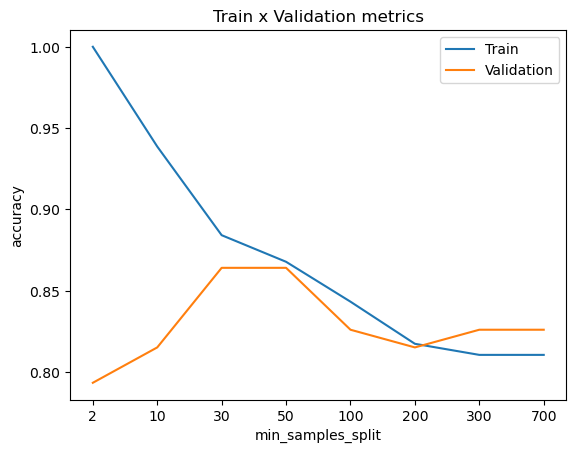

In [13]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

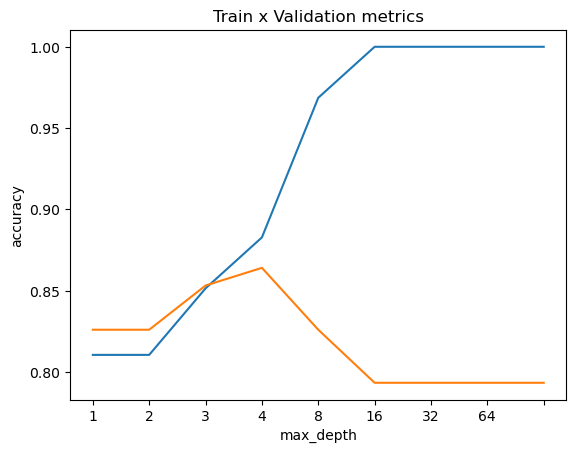

In [14]:
accuracy_list_train = []
accuracy_list_val = [] 
for max_depth in max_depth_list: 
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator. 
    model = DecisionTreeClassifier(max_depth = max_depth, 
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset 
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset 
    accuracy_train = accuracy_score(predictions_train,y_train) 
    accuracy_val = accuracy_score(predictions_val,y_val) 
    accuracy_list_train.append(accuracy_train) 
    accuracy_list_val.append(accuracy_val) 
 
plt.title('Train x Validation metrics') 
plt.xlabel('max_depth') 
plt.ylabel('accuracy') 
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list) 
plt.plot(accuracy_list_train) 
plt.plot(accuracy_list_val) 


In [15]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,max_depth = 3, random_state = RANDOM_STATE).fit(X_train,y_train) 
 
print(f"Decision tree Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}") 
print(f"Decision tree Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}") 

Decision tree Metrics train:
	Accuracy score: 0.8515
Decision tree Metrics validation:
	Accuracy score: 0.8533


In [16]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [2, 4, 8, 16, 32, 64, None] 
n_estimators_list = [10,50,100,500] 

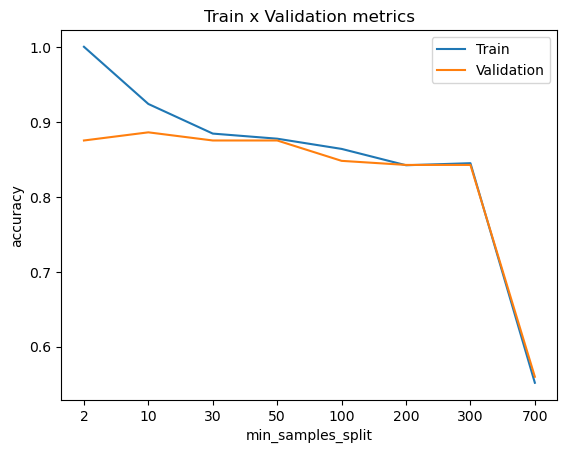

In [17]:
accuracy_list_train = [] 
accuracy_list_val = [] 
for min_samples_split in min_samples_split_list: 
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator. 
    model = RandomForestClassifier(min_samples_split = min_samples_split, 
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset 
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset 
    accuracy_train = accuracy_score(predictions_train,y_train) 
    accuracy_val = accuracy_score(predictions_val,y_val) 
    accuracy_list_train.append(accuracy_train) 
    accuracy_list_val.append(accuracy_val) 
 
plt.title('Train x Validation metrics') 
plt.xlabel('min_samples_split') 
plt.ylabel('accuracy') 
plt.xticks(ticks = range(len(min_samples_split_list 
)),labels=min_samples_split_list) 
plt.plot(accuracy_list_train) 
plt.plot(accuracy_list_val) 
plt.legend(['Train','Validation']) 
plt.show()

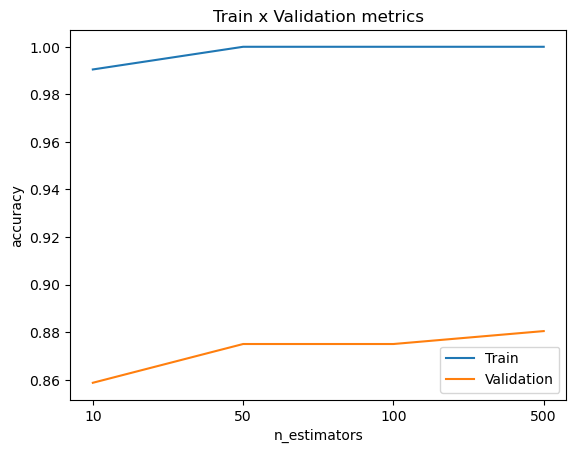

In [18]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Let's fit a random forest with the following parameters:
• max_depth : 16 
• min_samples_split : 10 
• n_estimators : 100 

In [19]:
random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 16, min_samples_split = 10).fit(X_train,y_train) 
 
print(f"Random forest Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nRandom forest Metrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Random forest Metrics train:
	Accuracy score: 0.9305
Random forest Metrics test:
	Accuracy score: 0.8804


We can use GridSearchCV to adjust the model to the best parameters combination 

In [20]:
param_grid = { 
    'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700], 
    'max_depth': [2, 4, 8, 16, 32, 64, None], 
    'n_estimators': [10, 50, 100, 500] 
}
# Create a RandomForestClassifier 
random_forest_model = RandomForestClassifier(random_state=RANDOM_STATE) 
 


In [21]:
# Create the GridSearchCV object 
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='accuracy') 

In [22]:
# Fit the grid search to the training data 
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=55),
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64, None],
                         'min_samples_split': [2, 10, 30, 50, 100, 200, 300,
                                               700],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [23]:
# Get the best parameters from the grid search 
best_params = grid_search.best_params_ 
 
# Get the best model from the grid search 
best_model = grid_search.best_estimator_ 
 

In [24]:
# Predictions on the validation set using the best model 
predictions_train= best_model.predict(X_train) 
predictions_val = best_model.predict(X_val) 
 

In [25]:
# Calculate accuracy on the validation set 
accuracy_val = accuracy_score(predictions_val, y_val) 
 
# Print the best parameters and validation accuracy 
print("Best Parameters:", best_params) 

Best Parameters: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [27]:
random_forest_model = RandomForestClassifier(n_estimators = 4, max_depth = 10, min_samples_split = 50).fit(X_train,y_train) 
 
print(f"Random forest Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nRandom forest Metrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Random forest Metrics train:
	Accuracy score: 0.8624
Random forest Metrics test:
	Accuracy score: 0.8587


We can see that the training accuracy reduced , but test accuracy increased. Hense we can conclude that GridSearchCV helped with overfitting and gave us an algorithm that is better at generalization.

XGBOOST

Let's define a subset of our training set 

In [28]:
n = int(len(X_train)*0.8) # Let's use 80% to train and 20% to evaluate

In [29]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train,y_train, eval_set = [(X_val,y_val)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.63217
[1]	validation_0-logloss:0.58866
[2]	validation_0-logloss:0.54916
[3]	validation_0-logloss:0.51662
[4]	validation_0-logloss:0.48831
[5]	validation_0-logloss:0.46555
[6]	validation_0-logloss:0.44389
[7]	validation_0-logloss:0.42575
[8]	validation_0-logloss:0.41191
[9]	validation_0-logloss:0.40042
[10]	validation_0-logloss:0.38960
[11]	validation_0-logloss:0.37889
[12]	validation_0-logloss:0.37138


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.36487
[14]	validation_0-logloss:0.35583
[15]	validation_0-logloss:0.34904
[16]	validation_0-logloss:0.34089
[17]	validation_0-logloss:0.33627
[18]	validation_0-logloss:0.33179
[19]	validation_0-logloss:0.32785
[20]	validation_0-logloss:0.32419
[21]	validation_0-logloss:0.32256
[22]	validation_0-logloss:0.32491
[23]	validation_0-logloss:0.32241
[24]	validation_0-logloss:0.32365
[25]	validation_0-logloss:0.32529
[26]	validation_0-logloss:0.32324
[27]	validation_0-logloss:0.32444
[28]	validation_0-logloss:0.32391
[29]	validation_0-logloss:0.32216
[30]	validation_0-logloss:0.32321
[31]	validation_0-logloss:0.32413
[32]	validation_0-logloss:0.32628
[33]	validation_0-logloss:0.32615
[34]	validation_0-logloss:0.32819
[35]	validation_0-logloss:0.32851
[36]	validation_0-logloss:0.33021
[37]	validation_0-logloss:0.32928
[38]	validation_0-logloss:0.33025
[39]	validation_0-logloss:0.33004


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [30]:
xgb_model.best_iteration

29

In [31]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9550
Metrics test:
	Accuracy score: 0.8859


Given these results, it seems that XGBOOST performs better on the training data, indicating that it fits the training data better. However, our Random forset with performs slightly better on the testing data, which suggests that it may generalize better to unseen data.